<a href="https://colab.research.google.com/github/charlybal/Data-and-Analytics/blob/main/Proyecto_No_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Proyecto Nr. 3

Curso: Data Science con Python

Integrantes del Equipo: Carlos Balderas

Profesora: Yaneth Ccahuantico

In [1]:
#Importamos Librerías

import numpy as np                                            #Con estas librerias hacemo el tratamiento de datos
import pandas as pd
import statsmodels.api as sm
import statistics as stats
import random

import matplotlib.pyplot as plt                               #Con estas librerías realizaremos los gráficos
import matplotlib.font_manager
from matplotlib import style
import seaborn as sns
style.use('ggplot') or plt.style.use('ggplot')

from sklearn.decomposition import PCA                       #Con estas librerias procesaremos y modelaremos de manera estadística
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

import warnings                                             #configuración de los warnings 
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
files.upload()

Saving Data_Nutricion_grupos.xlsx to Data_Nutricion_grupos.xlsx


{'Data_Nutricion_grupos.xlsx': b'PK\x03\x04\x14\x00\x08\x08\x08\x00\x06w\\T\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x18\x00\x00\x00xl/drawings/drawing1.xml\x9d\xd0]n\xc20\x0c\x07\xf0\x13\xec\x0eU\xdeiZ\x18\x13C\x14^\xd0N0\x0e\xe0%n\x1b\x91\x8f\xca\x0e\xa3\xdc~\xd1J6i{\x01\x1em\xcb?\xf9\xef\xcdnt\xb6\xf8Db\x13|#\xea\xb2\x12\x05z\x15\xb4\xf1]#\x0e\xefo\xb3\x95(8\x82\xd7`\x83\xc7F\\\x90\xc5n\xfb\xb4\x195\xad\xcf\xbc\xa7"\xed{^\xa7\xb2\x11}\x8c\xc3ZJV=:\xe02\x0c\xe8\xd3\xb4\r\xe4 \xa6\x92:\xa9\t\xceIvV\xce\xab\xeaE\xf2@\x08\x9a{\xc4\xb8\x9f&\xe2\xea\xc1\x03\x9a\x03\xe3\xf3\xfeM\xd7\x84\xb65\n\xf7A\x9d\x1c\xfa8!\x84\x16b\xfa\x05\xf7f\xe0\xac\xa9\x07\xaeQ=P\xfc\x01\xc6\x7f\x823\x8a\x02\x876\x96*\xb8\xeb)\xd9HB\xfd<\t8\xfe\x1a\xf5\xdd\xc8R\xbe\xca\xd5_\xc8\xdd\x14\xc7\x01\x1dO\xc3,\xb9Cz\xc8\x87\xb1&^\xbe\x93eFw\xee\x81\xb7h\x03\x1d\x81\xcb\xc8\xb88\xf8\xe3\xdd\xb1*\xc96\xb5(+l\xb1^\xde\xad\xcc\xb3"\xb7_PK\x07\x08\x07bi\x83\x05\x01\x00\x00\x07\x03\x00\x00PK\x03\x04\x14\x00\x08\x08\x08

In [4]:
data_nutricion = pd.read_excel('Data_Nutricion_grupos.xlsx')              #hacemos mas amigable la información del archivo mas amigable
data_nutricion.head(15)


,Individuo,talla,edad,peso_kg,circun_cuello,IMC,circun_cintura,cadera,ind_cintura_cadera,ind_cintura_estatura,por_grasa_corporal,masa_corporal_magra_kg,pliegue_cutaneo_BICEPS,pliegue_cutaneo_TRICEPS,pliegue_cutaneo_ESCAPULAR,pliegue_cutaneo_SUPRAILIACO,Grupos
0,Persona 1,155.7,16.0,71.2,35.7,29.576170,90.0,98.0,0.918367,0.578035,36.446202,45.250304,13.0,27.0,32.0,34.0,A
1,Persona 2,166.5,16.0,61.0,31.8,22.364707,80.9,100.5,0.804975,0.485886,28.790714,43.437664,5.0,19.0,15.0,22.0,A
2,Persona 3,151.3,16.0,49.1,30.5,21.623567,72.0,86.0,0.837209,0.475876,29.867419,34.435097,13.0,18.0,18.0,17.0,A
3,Persona 4,151.7,16.0,54.6,32.6,23.117479,NaN,88.4,0.841629,0.490442,27.867640,39.384269,5.0,19.0,15.0,18.0,A
4,Persona 5,160.3,16.0,58.0,30.1,22.260196,NaN,97.9,0.813075,NaN,30.276688,40.439521,10.0,19.0,20.0,19.0,A
5,Persona 6,162.4,16.0,70.8,33.9,26.124451,86.5,106.1,0.815269,0.532635,31.439726,48.540674,11.0,25.0,18.0,20.0,A
6,Persona 7,167.0,16.0,47.4,30.5,17.318656,66.7,81.5,NaN,0.399401,9.690057,42.806913,3.5,7.0,6.0,6.0,A
7,Persona 8,158.7,16.0,49.3,31.2,18.979031,69.3,83.2,0.832933,0.436673,NaN,41.235083,5.5,12.0,10.5,11.5,A
8,Persona 9,158.2,16.0,91.0,37.5,35.521296,107.5,116.0,0.926724,0.679520,34.760913,59.367569,25.0,21.0,25.0,23.0,A
9,Persona 10,171.0,16.0,50.4,30.8,17.543860,66.0,80.0,0.825000,0.385965,12.045941,44.328846,3.0,7.0,8.5,9.0,A


In [5]:
data_nutricion.info()                                                     #analizamos información del archivo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Individuo                    652 non-null    object 
 1   talla                        624 non-null    float64
 2   edad                         645 non-null    float64
 3   peso_kg                      629 non-null    float64
 4   circun_cuello                623 non-null    float64
 5   IMC                          640 non-null    float64
 6   circun_cintura               637 non-null    float64
 7   cadera                       647 non-null    float64
 8   ind_cintura_cadera           639 non-null    float64
 9   ind_cintura_estatura         636 non-null    float64
 10  por_grasa_corporal           650 non-null    float64
 11  masa_corporal_magra_kg       648 non-null    float64
 12  pliegue_cutaneo_BICEPS       652 non-null    float64
 13  pliegue_cutaneo_TRIC

In [6]:
#Sepramos en 2 partes, la data numérica y la data categórica. 
#Data numérica
data_nutricion_num = data_nutricion.iloc[:,1:16]
data_nutricion_num.head(10)


,talla,edad,peso_kg,circun_cuello,IMC,circun_cintura,cadera,ind_cintura_cadera,ind_cintura_estatura,por_grasa_corporal,masa_corporal_magra_kg,pliegue_cutaneo_BICEPS,pliegue_cutaneo_TRICEPS,pliegue_cutaneo_ESCAPULAR,pliegue_cutaneo_SUPRAILIACO
0,155.7,16.0,71.2,35.7,29.576170,90.0,98.0,0.918367,0.578035,36.446202,45.250304,13.0,27.0,32.0,34.0
1,166.5,16.0,61.0,31.8,22.364707,80.9,100.5,0.804975,0.485886,28.790714,43.437664,5.0,19.0,15.0,22.0
2,151.3,16.0,49.1,30.5,21.623567,72.0,86.0,0.837209,0.475876,29.867419,34.435097,13.0,18.0,18.0,17.0
3,151.7,16.0,54.6,32.6,23.117479,NaN,88.4,0.841629,0.490442,27.867640,39.384269,5.0,19.0,15.0,18.0
4,160.3,16.0,58.0,30.1,22.260196,NaN,97.9,0.813075,NaN,30.276688,40.439521,10.0,19.0,20.0,19.0
5,162.4,16.0,70.8,33.9,26.124451,86.5,106.1,0.815269,0.532635,31.439726,48.540674,11.0,25.0,18.0,20.0
6,167.0,16.0,47.4,30.5,17.318656,66.7,81.5,NaN,0.399401,9.690057,42.806913,3.5,7.0,6.0,6.0
7,158.7,16.0,49.3,31.2,18.979031,69.3,83.2,0.832933,0.436673,NaN,41.235083,5.5,12.0,10.5,11.5
8,158.2,16.0,91.0,37.5,35.521296,107.5,116.0,0.926724,0.679520,34.760913,59.367569,25.0,21.0,25.0,23.0
9,171.0,16.0,50.4,30.8,17.543860,66.0,80.0,0.825000,0.385965,12.045941,44.328846,3.0,7.0,8.5,9.0


In [56]:
#Data Categórica
data_nutricion_cat = data_nutricion.loc[:,['Individuo', 'Grupos']]
data_nutricion_cat.head(6)

,Individuo,Grupos
0,Persona 1,A
1,Persona 2,A
2,Persona 3,A
3,Persona 4,A
4,Persona 5,A
5,Persona 6,A


In [8]:
data_nutricion_num.info()                                         #Analizando la información de las variables numéricas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   talla                        624 non-null    float64
 1   edad                         645 non-null    float64
 2   peso_kg                      629 non-null    float64
 3   circun_cuello                623 non-null    float64
 4   IMC                          640 non-null    float64
 5   circun_cintura               637 non-null    float64
 6   cadera                       647 non-null    float64
 7   ind_cintura_cadera           639 non-null    float64
 8   ind_cintura_estatura         636 non-null    float64
 9   por_grasa_corporal           650 non-null    float64
 10  masa_corporal_magra_kg       648 non-null    float64
 11  pliegue_cutaneo_BICEPS       652 non-null    float64
 12  pliegue_cutaneo_TRICEPS      652 non-null    float64
 13  pliegue_cutaneo_ESCA

In [9]:
data_nutricion_num[data_nutricion_num.duplicated()].head()         #No tenemos filas duplicadas

,talla,edad,peso_kg,circun_cuello,IMC,circun_cintura,cadera,ind_cintura_cadera,ind_cintura_estatura,por_grasa_corporal,masa_corporal_magra_kg,pliegue_cutaneo_BICEPS,pliegue_cutaneo_TRICEPS,pliegue_cutaneo_ESCAPULAR,pliegue_cutaneo_SUPRAILIACO


In [10]:
data_nutricion_cat.info()                           #Analizamos información de las variables categóricas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Individuo  652 non-null    object
 1   Grupos     652 non-null    object
dtypes: object(2)
memory usage: 10.3+ KB


In [11]:
data_nutricion_cat[data_nutricion_cat.duplicated()].head()      #No hay filas duplicadas

,Individuo,Grupos


In [12]:
#no tenemos datos nulos en las variables categóricas pero si en las variables numéricas
#por lo cual sería pertinente conocer los valores de la media de mis variables
#numéricas así como su desviación estándar para conocer la disperción que existe de los datos
# y así saber mas sobre mis datos outliers y deicidir si podemos usar la media para imputar los datos nulos.

data_nutricion_num.describe()






,talla,edad,peso_kg,circun_cuello,IMC,circun_cintura,cadera,ind_cintura_cadera,ind_cintura_estatura,por_grasa_corporal,masa_corporal_magra_kg,pliegue_cutaneo_BICEPS,pliegue_cutaneo_TRICEPS,pliegue_cutaneo_ESCAPULAR,pliegue_cutaneo_SUPRAILIACO
count,624.000000,645.000000,629.000000,623.000000,640.000000,637.000000,647.000000,639.000000,636.000000,650.000000,648.000000,652.000000,652.000000,652.000000,652.000000
mean,158.821474,14.753488,56.943561,32.138042,22.426463,74.517425,89.868470,0.831048,0.470617,23.538992,43.379476,9.181748,15.647239,14.383436,14.679448
std,7.477915,1.054276,8.592938,2.156724,3.046897,6.915982,7.210739,0.054721,0.046455,7.860764,6.928913,5.661837,5.692567,5.307465,5.953868
min,135.600000,0.000000,33.900000,24.500000,14.537886,55.000000,69.800000,0.654018,0.362319,4.214310,28.498090,2.000000,5.000000,5.000000,3.000000
25%,153.700000,14.000000,51.000000,30.700000,20.274879,70.000000,85.000000,0.794296,0.438694,15.971877,38.154599,5.000000,11.000000,10.000000,10.000000
50%,158.200000,15.000000,55.800000,32.000000,22.174447,73.600000,89.000000,0.827897,0.464779,26.094372,42.357287,8.000000,16.000000,14.000000,15.000000
75%,163.700000,15.000000,61.700000,33.500000,23.914351,78.000000,94.000000,0.866831,0.494481,30.073493,48.120857,12.000000,19.000000,18.000000,19.000000
max,188.600000,17.000000,91.100000,39.200000,36.708603,107.500000,120.800000,1.026528,0.704411,39.445282,71.568947,90.000000,39.000000,35.000000,35.000000


In [13]:
#data_nutricion_num2 = data_nutricion_num.apply(lambda x: x.fillna(x.mean()), axis = 0)       #imputamos usando la media las variables numéricas
data_nutricion_num2 = data_nutricion_num.fillna(data_nutricion_num.mean())
data_nutricion_num2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   talla                        652 non-null    float64
 1   edad                         652 non-null    float64
 2   peso_kg                      652 non-null    float64
 3   circun_cuello                652 non-null    float64
 4   IMC                          652 non-null    float64
 5   circun_cintura               652 non-null    float64
 6   cadera                       652 non-null    float64
 7   ind_cintura_cadera           652 non-null    float64
 8   ind_cintura_estatura         652 non-null    float64
 9   por_grasa_corporal           652 non-null    float64
 10  masa_corporal_magra_kg       652 non-null    float64
 11  pliegue_cutaneo_BICEPS       652 non-null    float64
 12  pliegue_cutaneo_TRICEPS      652 non-null    float64
 13  pliegue_cutaneo_ESCA

In [14]:
data_nutricion_num2.head(10)

,talla,edad,peso_kg,circun_cuello,IMC,circun_cintura,cadera,ind_cintura_cadera,ind_cintura_estatura,por_grasa_corporal,masa_corporal_magra_kg,pliegue_cutaneo_BICEPS,pliegue_cutaneo_TRICEPS,pliegue_cutaneo_ESCAPULAR,pliegue_cutaneo_SUPRAILIACO
0,155.7,16.0,71.2,35.7,29.576170,90.000000,98.0,0.918367,0.578035,36.446202,45.250304,13.0,27.0,32.0,34.0
1,166.5,16.0,61.0,31.8,22.364707,80.900000,100.5,0.804975,0.485886,28.790714,43.437664,5.0,19.0,15.0,22.0
2,151.3,16.0,49.1,30.5,21.623567,72.000000,86.0,0.837209,0.475876,29.867419,34.435097,13.0,18.0,18.0,17.0
3,151.7,16.0,54.6,32.6,23.117479,74.517425,88.4,0.841629,0.490442,27.867640,39.384269,5.0,19.0,15.0,18.0
4,160.3,16.0,58.0,30.1,22.260196,74.517425,97.9,0.813075,0.470617,30.276688,40.439521,10.0,19.0,20.0,19.0
5,162.4,16.0,70.8,33.9,26.124451,86.500000,106.1,0.815269,0.532635,31.439726,48.540674,11.0,25.0,18.0,20.0
6,167.0,16.0,47.4,30.5,17.318656,66.700000,81.5,0.831048,0.399401,9.690057,42.806913,3.5,7.0,6.0,6.0
7,158.7,16.0,49.3,31.2,18.979031,69.300000,83.2,0.832933,0.436673,23.538992,41.235083,5.5,12.0,10.5,11.5
8,158.2,16.0,91.0,37.5,35.521296,107.500000,116.0,0.926724,0.679520,34.760913,59.367569,25.0,21.0,25.0,23.0
9,171.0,16.0,50.4,30.8,17.543860,66.000000,80.0,0.825000,0.385965,12.045941,44.328846,3.0,7.0,8.5,9.0


In [15]:
arrdat = data_nutricion_num2.to_numpy()                                               #Agregamos una columna en un cálculo que se hizo, dividiendo el IMC / Curcunferencia_cintura
diab = arrdat[:,4]/arrdat[:,5]                                                        # nos arroja una relación que existe entre la masa de una persona con el ancho de su cintura. 
diab_DF = pd.DataFrame(diab)                                                          #lo cual nos muestra una tendencia a tener diabetes. 
data_nutricion_num2.insert(15, "Agregado 1", diab_DF, allow_duplicates=False)         #Convertimos primero el datframe en un arreglo para realiar los cálculos, después converetimos 
#data_nutricion_num2 = pd.concat([data_nutricion_num2, diab_DF], axis = 1)            #ese vector nuevo en un dataframe y por último lo agrgamos al Dataframe original numérico.
data_nutricion_num2






,talla,edad,peso_kg,circun_cuello,IMC,circun_cintura,cadera,ind_cintura_cadera,ind_cintura_estatura,por_grasa_corporal,masa_corporal_magra_kg,pliegue_cutaneo_BICEPS,pliegue_cutaneo_TRICEPS,pliegue_cutaneo_ESCAPULAR,pliegue_cutaneo_SUPRAILIACO,Agregado 1
0,155.7,16.0,71.2,35.7,29.576170,90.000000,98.0,0.918367,0.578035,36.446202,45.250304,13.0,27.0,32.0,34.0,0.328624
1,166.5,16.0,61.0,31.8,22.364707,80.900000,100.5,0.804975,0.485886,28.790714,43.437664,5.0,19.0,15.0,22.0,0.276449
2,151.3,16.0,49.1,30.5,21.623567,72.000000,86.0,0.837209,0.475876,29.867419,34.435097,13.0,18.0,18.0,17.0,0.300327
3,151.7,16.0,54.6,32.6,23.117479,74.517425,88.4,0.841629,0.490442,27.867640,39.384269,5.0,19.0,15.0,18.0,0.310229
4,160.3,16.0,58.0,30.1,22.260196,74.517425,97.9,0.813075,0.470617,30.276688,40.439521,10.0,19.0,20.0,19.0,0.298725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,165.5,14.0,88.0,32.5,21.029381,72.500000,85.0,0.852941,0.438066,19.209928,71.095263,12.0,13.0,12.0,13.0,0.290060
648,144.2,14.0,48.6,31.5,23.132073,73.000000,87.5,0.834286,0.506241,28.565420,34.717206,8.0,18.0,18.0,16.0,0.316878
649,154.0,15.0,58.9,31.5,22.769438,85.000000,96.0,0.885417,0.551948,26.623783,43.218592,8.0,12.0,14.0,18.0,0.267876
650,174.3,14.0,88.7,37.0,27.023922,85.800000,101.0,0.849505,0.492255,22.424506,68.809463,11.0,16.0,18.0,20.0,0.314964


In [16]:
data_nutricion_num3 = data_nutricion_num2.rename(columns = {'Agregado 1': 'riesgo_diab'})         #cambiamos nombre a la columna agrgada
data_nutricion_num3

,talla,edad,peso_kg,circun_cuello,IMC,circun_cintura,cadera,ind_cintura_cadera,ind_cintura_estatura,por_grasa_corporal,masa_corporal_magra_kg,pliegue_cutaneo_BICEPS,pliegue_cutaneo_TRICEPS,pliegue_cutaneo_ESCAPULAR,pliegue_cutaneo_SUPRAILIACO,riesgo_diab
0,155.7,16.0,71.2,35.7,29.576170,90.000000,98.0,0.918367,0.578035,36.446202,45.250304,13.0,27.0,32.0,34.0,0.328624
1,166.5,16.0,61.0,31.8,22.364707,80.900000,100.5,0.804975,0.485886,28.790714,43.437664,5.0,19.0,15.0,22.0,0.276449
2,151.3,16.0,49.1,30.5,21.623567,72.000000,86.0,0.837209,0.475876,29.867419,34.435097,13.0,18.0,18.0,17.0,0.300327
3,151.7,16.0,54.6,32.6,23.117479,74.517425,88.4,0.841629,0.490442,27.867640,39.384269,5.0,19.0,15.0,18.0,0.310229
4,160.3,16.0,58.0,30.1,22.260196,74.517425,97.9,0.813075,0.470617,30.276688,40.439521,10.0,19.0,20.0,19.0,0.298725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,165.5,14.0,88.0,32.5,21.029381,72.500000,85.0,0.852941,0.438066,19.209928,71.095263,12.0,13.0,12.0,13.0,0.290060
648,144.2,14.0,48.6,31.5,23.132073,73.000000,87.5,0.834286,0.506241,28.565420,34.717206,8.0,18.0,18.0,16.0,0.316878
649,154.0,15.0,58.9,31.5,22.769438,85.000000,96.0,0.885417,0.551948,26.623783,43.218592,8.0,12.0,14.0,18.0,0.267876
650,174.3,14.0,88.7,37.0,27.023922,85.800000,101.0,0.849505,0.492255,22.424506,68.809463,11.0,16.0,18.0,20.0,0.314964


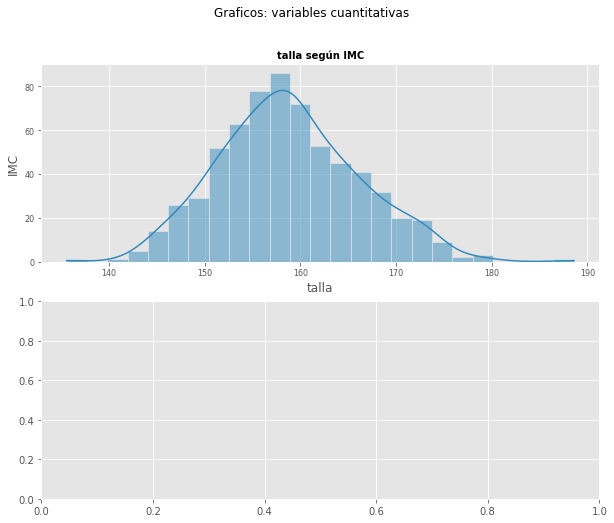

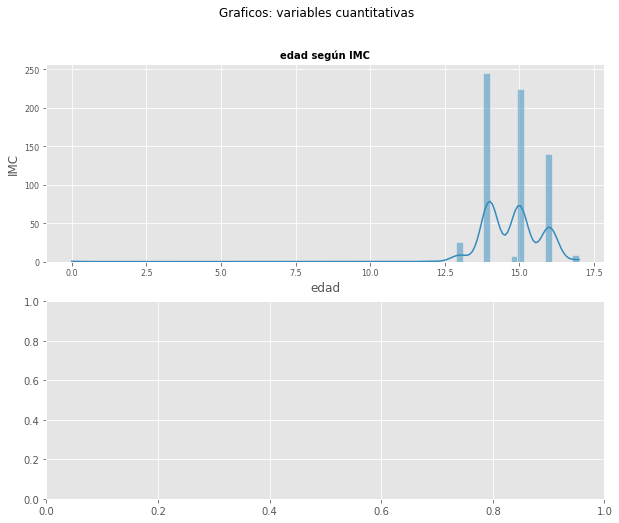

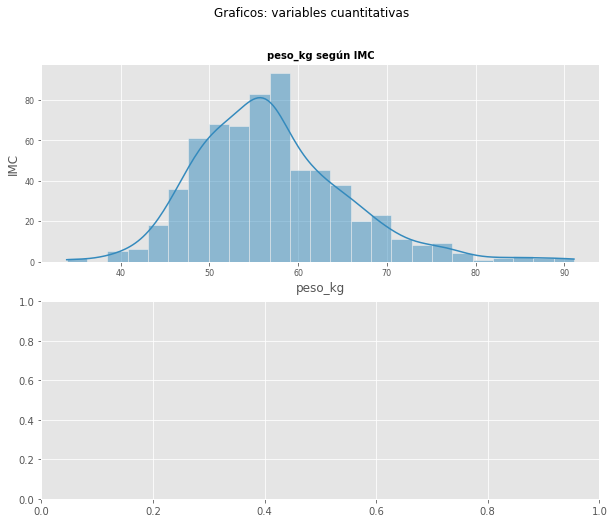

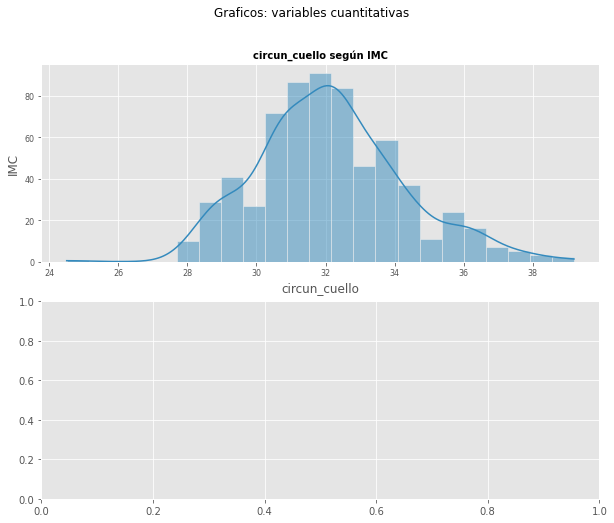

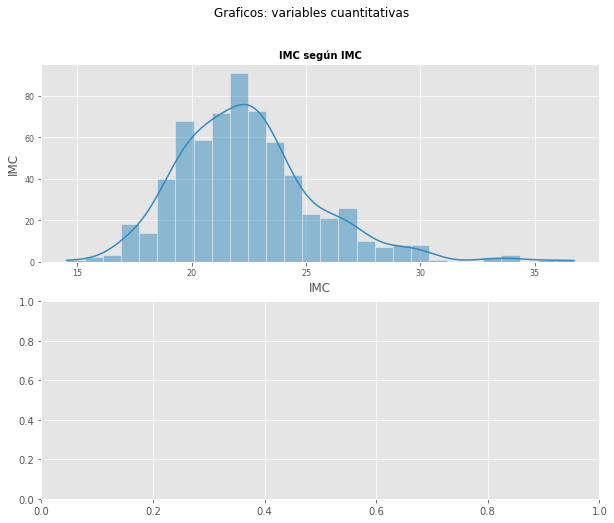

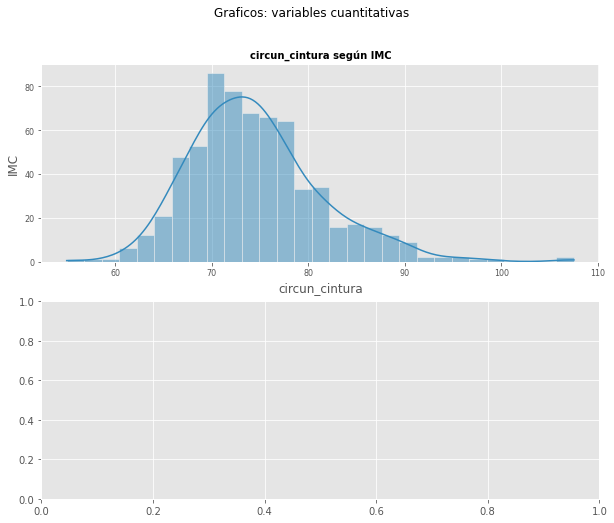

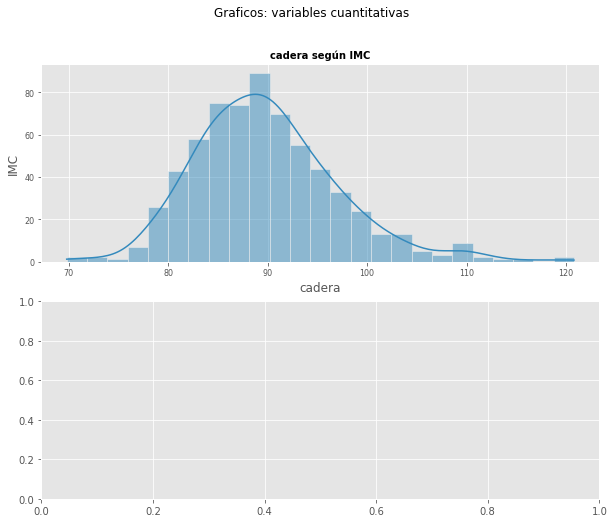

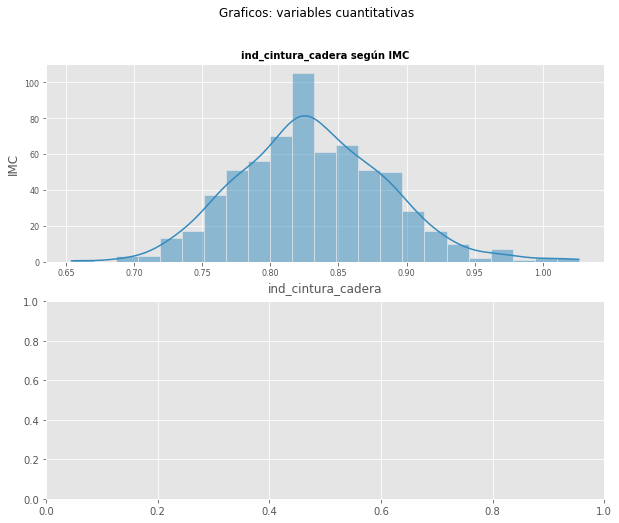

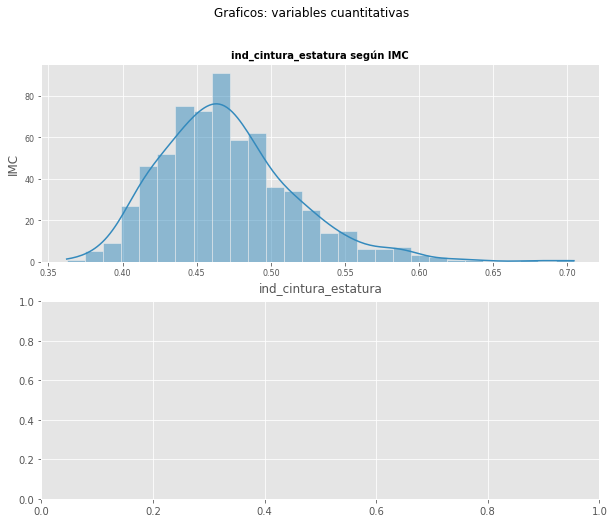

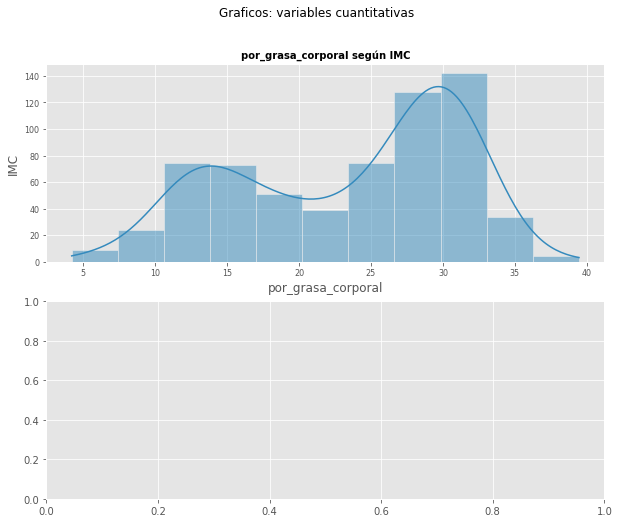

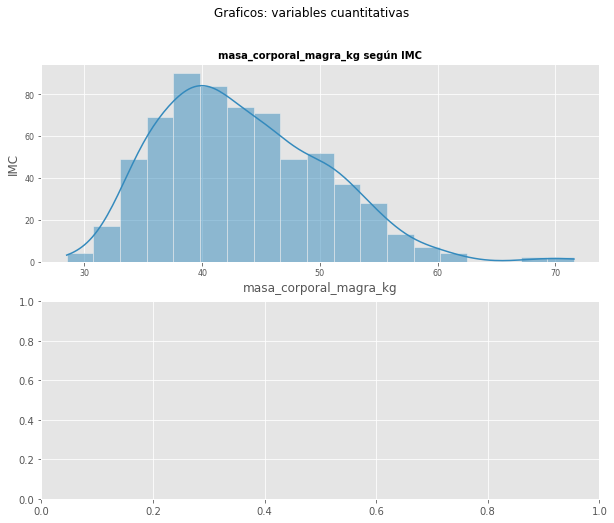

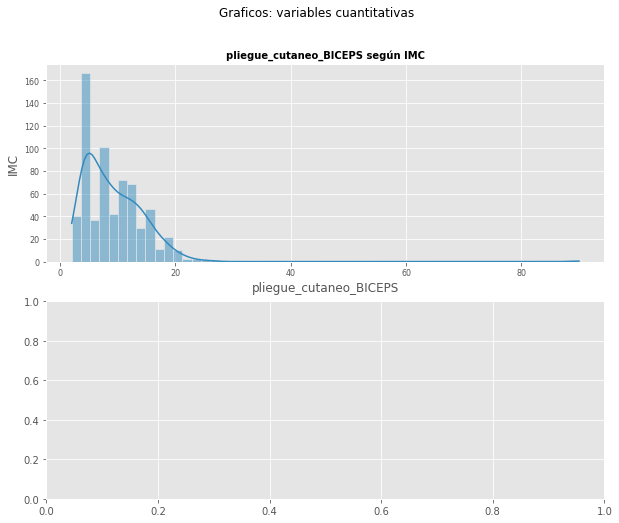

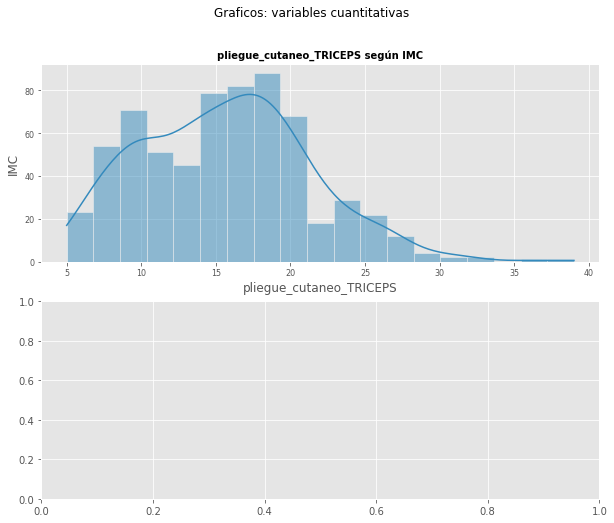

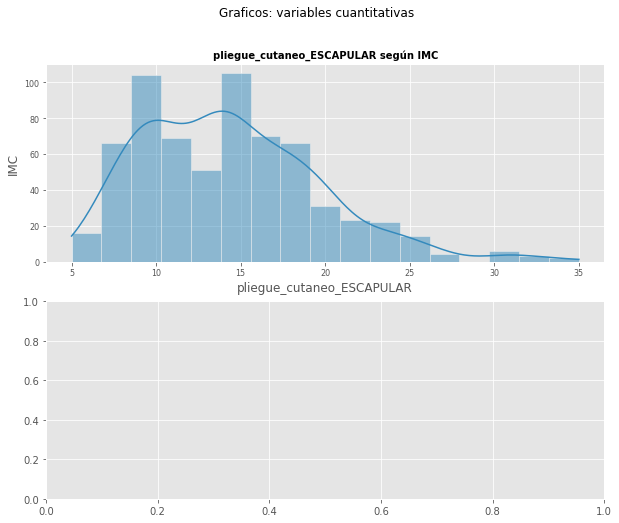

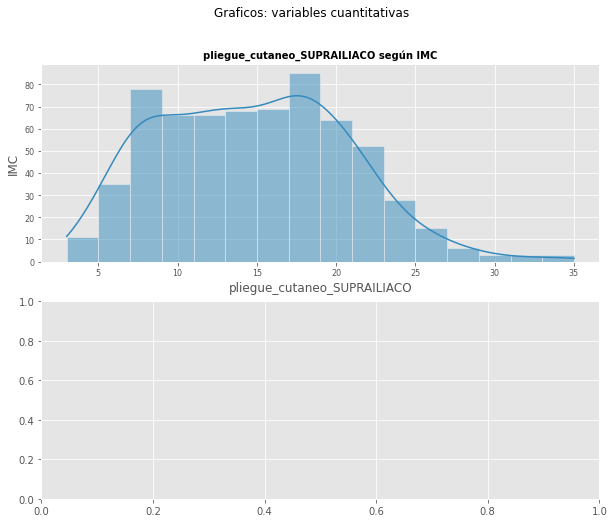

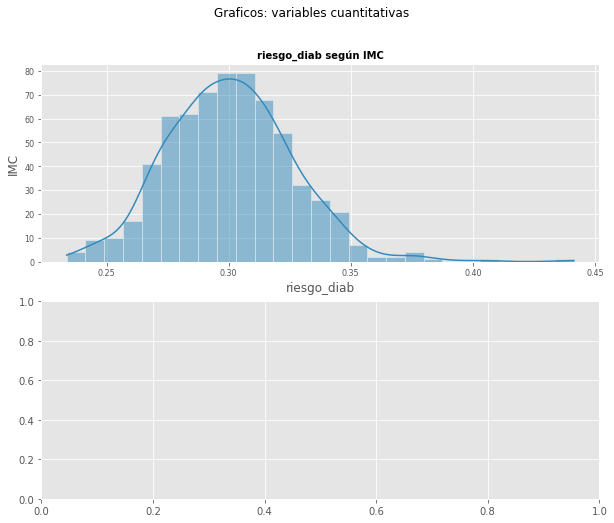

In [17]:
#Graficamos Variables cuantitativas
for i, colum in enumerate(data_nutricion_num3):
  fig, ax = plt.subplots(2,1, figsize=(10,8))
  fig.suptitle('Graficos: variables cuantitativas')

  #sns.violinplot(x = 'IMC', y = colum, data = data_nutricion_num3, ax = ax[0])
  #ax[0].set_title(str(colum) + "según IMC", fontsize = 10, fontweight = "bold")
  #ax[0].tick_params(labelsize = 8)
  #ax[0].set_xlabel('IMC')

  #sns.boxplot(y = colum, data = data_nutricion_num3, ax = ax[1])
  #ax[1].set_title(str(colum) + "según IMC", fontsize = 10, fontweight = "bold")
  #ax[1].tick_params(labelsize = 8)
  #ax[1].set_xlabel('IMC')

  sns.histplot(x=colum, data=data_nutricion_num3, kde= True, ax = ax[0])
  ax[0].set_title(str(colum) + " " + "según IMC", fontsize = 10, fontweight = "bold")
  ax[0].tick_params(labelsize = 8)
  ax[0].set_ylabel('IMC')



In [18]:
correlacion = data_nutricion_num3.corr(method='pearson').round(3)                     #Realizamos una correlación para verificar la relación dentre variables

correlacion

,talla,edad,peso_kg,circun_cuello,IMC,circun_cintura,cadera,ind_cintura_cadera,ind_cintura_estatura,por_grasa_corporal,masa_corporal_magra_kg,pliegue_cutaneo_BICEPS,pliegue_cutaneo_TRICEPS,pliegue_cutaneo_ESCAPULAR,pliegue_cutaneo_SUPRAILIACO,riesgo_diab
talla,1.000,0.089,0.462,0.185,-0.149,0.163,0.024,0.203,-0.307,-0.505,0.748,-0.307,-0.356,-0.258,-0.305,-0.406
edad,0.089,1.000,0.145,0.098,0.147,0.156,0.174,0.014,0.113,0.051,0.108,-0.028,0.026,0.065,0.065,0.071
peso_kg,0.462,0.145,1.000,0.752,0.745,0.776,0.689,0.277,0.544,0.202,0.772,0.205,0.346,0.481,0.410,0.322
circun_cuello,0.185,0.098,0.752,1.000,0.757,0.692,0.494,0.391,0.592,0.112,0.623,0.132,0.292,0.466,0.369,0.430
IMC,-0.149,0.147,0.745,0.757,1.000,0.768,0.780,0.159,0.828,0.591,0.308,0.451,0.664,0.741,0.680,0.723
circun_cintura,0.163,0.156,0.776,0.692,0.768,1.000,0.698,0.529,0.858,0.347,0.489,0.283,0.440,0.595,0.523,0.117
cadera,0.024,0.174,0.689,0.494,0.780,0.698,1.000,-0.202,0.670,0.620,0.239,0.405,0.677,0.654,0.657,0.460
ind_cintura_cadera,0.203,0.014,0.277,0.391,0.159,0.529,-0.202,1.000,0.411,-0.256,0.408,-0.091,-0.190,0.068,-0.049,-0.320
ind_cintura_estatura,-0.307,0.113,0.544,0.592,0.828,0.858,0.670,0.411,1.000,0.573,0.127,0.419,0.596,0.700,0.652,0.362
por_grasa_corporal,-0.505,0.051,0.202,0.112,0.591,0.347,0.620,-0.256,0.573,1.000,-0.434,0.705,0.877,0.755,0.839,0.554


Text(0.5, 1.0, 'Gráfico de la correlación de las variables numéricas')

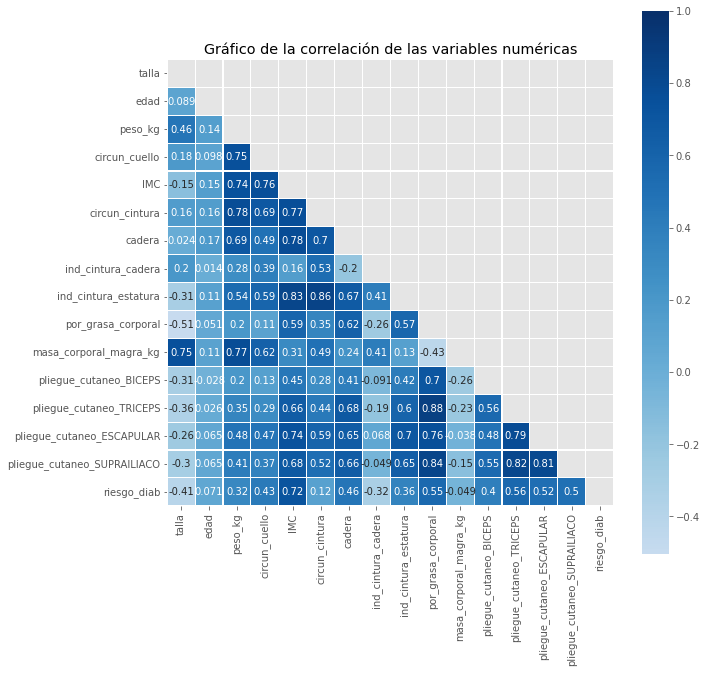

In [19]:
mask = np.triu(np.ones_like(correlacion, dtype=bool )) #la máscara para el triángulo superior del gráfico
f, ax = plt.subplots(figsize = (10,10)) # la base para el gráfico
g = sns.heatmap(correlacion, mask = mask, cmap='Blues', vmax=1, center = 0, 
            square = True, linewidths=.1, annot=True)                                   #hacemos un mapa de calor, para verificar las relaciones. 

g.set_title("Gráfico de la correlación de las variables numéricas")

In [57]:

c = []                                                                    #Aqui creamos otra variable cualitativa para poder realizar ma gráficos
for x in data_nutricion_num2['circun_cintura']:                           # además nos ayuda en el objeto de estudio ya que una cintura por encima de 
  if x > 90:                                                              # los 90 cm es conciderada de una persona obesa. 
    a = "Obeso"
  if x >= 80 and x <= 90: 
    a = "Normal"
  else: 
    a = "Delgado"
  c.append(a)

data_nutricion_cat.insert(2,"Obesidad - circun_cintura", c, allow_duplicates=False)  #Agregamos la columna creada al data frame de variables cualitativas
data_nutricion_cat



,Individuo,Grupos,Obesidad - circun_cintura
0,Persona 1,A,Normal
1,Persona 2,A,Normal
2,Persona 3,A,Delgado
3,Persona 4,A,Delgado
4,Persona 5,A,Delgado
...,...,...,...
647,Persona 648,B,Delgado
648,Persona 649,B,Delgado
649,Persona 650,B,Normal
650,Persona 651,B,Normal


In [60]:
data_nutricion_cat2 = data_nutricion_cat.drop(columns = ["Individuo"])



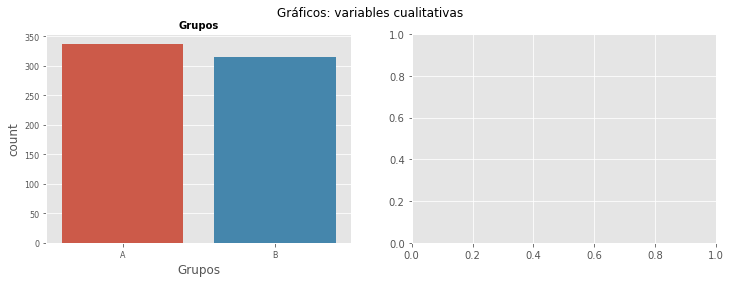

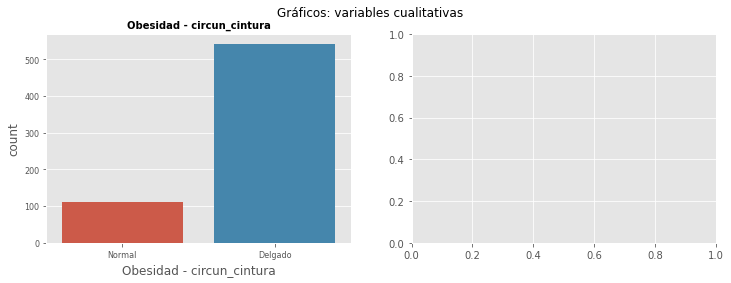

In [77]:
#Graficos para variables cualitativas

for i, colum in enumerate(data_nutricion_cat2): 
    fig, ax = plt.subplots(1, 2, figsize=(12, 3.84))
    fig.suptitle('Gráficos: variables cualitativas')

    sns.countplot(x=colum, data=data_nutricion_cat2, ax=ax[0])
    ax[0].set_title(str(colum), fontsize = 10, fontweight = "bold")
    ax[0].tick_params(labelsize = 8)
    ax[0].set_xlabel(colum)

    #sns.countplot(x=colum, hue="Obesidad - circun_cintura", data=data_nutricion_cat2, palette="Blues", ax=ax[1])
    #ax[1].set_title(str(colum), fontsize = 10, fontweight = "bold")
    #ax[1].tick_params(labelsize = 8)
    #ax[1].set_xlabel(colum)



